# WeatherPy 

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | villa de soto
Processing Record 2 of Set 1 | kolonia
Processing Record 3 of Set 1 | sefwi wiawso
City not found. Skipping...
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 6 of Set 1 | kenora
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | pangody
Processing Record 10 of Set 1 | bonnyville
Processing Record 11 of Set 1 | inekar
City not found. Skipping...
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | daru
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | acarau
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | galax
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | waitangi


Processing Record 38 of Set 4 | dunedin
Processing Record 39 of Set 4 | pisco
Processing Record 40 of Set 4 | holualoa
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | aripuana
Processing Record 43 of Set 4 | colonia
Processing Record 44 of Set 4 | galich
Processing Record 45 of Set 4 | tame
Processing Record 46 of Set 4 | zabol
Processing Record 47 of Set 4 | vorkuta
Processing Record 48 of Set 4 | port blair
Processing Record 49 of Set 4 | quellon
Processing Record 0 of Set 5 | lorengau
Processing Record 1 of Set 5 | touros
Processing Record 2 of Set 5 | phek
Processing Record 3 of Set 5 | ascension
Processing Record 4 of Set 5 | hammerfest
Processing Record 5 of Set 5 | pervomaysk
Processing Record 6 of Set 5 | praia da vitoria
Processing Record 7 of Set 5 | baiti
Processing Record 8 of Set 5 | isangel
Processing Record 9 of Set 5 | tommot
Processing Record 10 of Set 5 | mamuju
Processing Record 11 of Set 5 | la passe
Processing Record 12 of Set 5 | sheopur
P

City not found. Skipping...
Processing Record 30 of Set 8 | yukhnov
Processing Record 31 of Set 8 | dwarka
Processing Record 32 of Set 8 | strezhevoy
Processing Record 33 of Set 8 | marion
Processing Record 34 of Set 8 | rahimah
Processing Record 35 of Set 8 | iskateley
Processing Record 36 of Set 8 | merizo village
Processing Record 37 of Set 8 | hovd
Processing Record 38 of Set 8 | inhambane
Processing Record 39 of Set 8 | vernon
Processing Record 40 of Set 8 | kidal
Processing Record 41 of Set 8 | monkayo
Processing Record 42 of Set 8 | dubovka
Processing Record 43 of Set 8 | petilia policastro
Processing Record 44 of Set 8 | twon-brass
Processing Record 45 of Set 8 | santa helena
Processing Record 46 of Set 8 | mount pearl
Processing Record 47 of Set 8 | jerada
Processing Record 48 of Set 8 | coffeyville
Processing Record 49 of Set 8 | velikiye luki
Processing Record 0 of Set 9 | mancio lima
Processing Record 1 of Set 9 | hayma'
City not found. Skipping...
Processing Record 2 of Se

-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,villa de soto,-30.8552,-64.9995,12.44,63,0,7.46,AR,1696374474
1,kolonia,50.9333,6.9500,14.38,77,0,4.12,DE,1696374313
2,isafjordur,66.0755,-23.1240,3.67,95,100,6.80,IS,1696374253
3,kenora,49.8167,-94.4337,20.99,77,100,8.49,CA,1696374475
4,puerto natales,-51.7236,-72.4875,5.48,88,34,3.01,CL,1696374476


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,villa de soto,-30.8552,-64.9995,12.44,63,0,7.46,AR,1696374474
1,kolonia,50.9333,6.9500,14.38,77,0,4.12,DE,1696374313
2,isafjordur,66.0755,-23.1240,3.67,95,100,6.80,IS,1696374253
3,kenora,49.8167,-94.4337,20.99,77,100,8.49,CA,1696374475
4,puerto natales,-51.7236,-72.4875,5.48,88,34,3.01,CL,1696374476


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

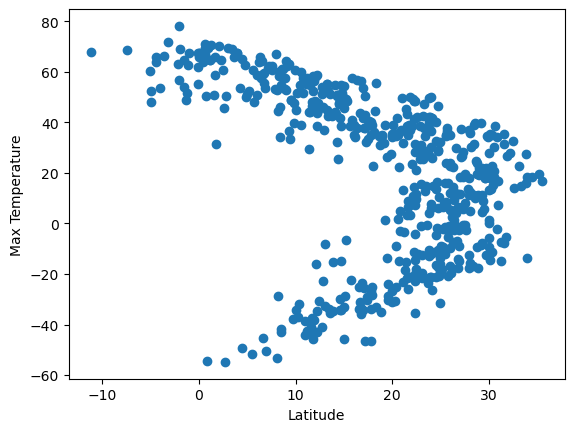

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

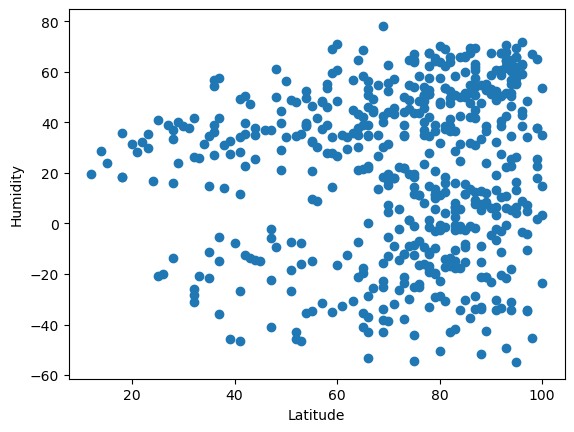

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

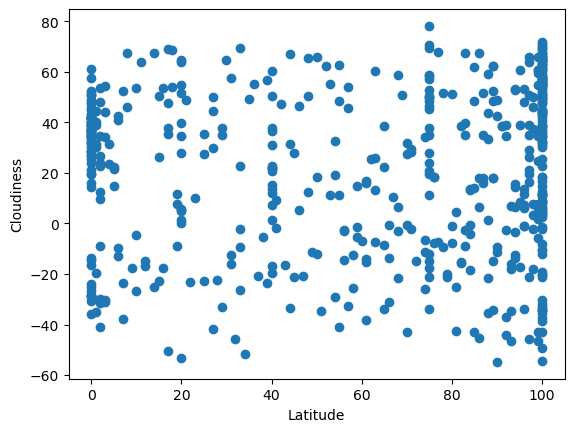

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

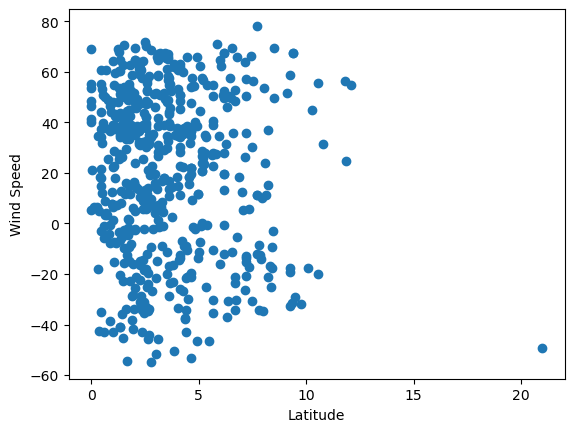

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kolonia,50.9333,6.9500,14.38,77,0,4.12,DE,1696374313
2,isafjordur,66.0755,-23.1240,3.67,95,100,6.80,IS,1696374253
3,kenora,49.8167,-94.4337,20.99,77,100,8.49,CA,1696374475
5,georgetown,5.4112,100.3354,26.12,94,20,0.00,MY,1696374177
6,pangody,65.8500,74.4859,0.00,82,50,3.57,RU,1696374477


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,villa de soto,-30.8552,-64.9995,12.44,63,0,7.46,AR,1696374474
4,puerto natales,-51.7236,-72.4875,5.48,88,34,3.01,CL,1696374476
8,port-aux-francais,-49.3500,70.2167,4.43,93,100,20.98,TF,1696374199
9,daru,-9.0763,143.2092,26.87,74,83,4.34,PG,1696374478
11,punta arenas,-53.1500,-70.9167,8.06,66,20,4.63,CL,1696374479


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.808964459543422


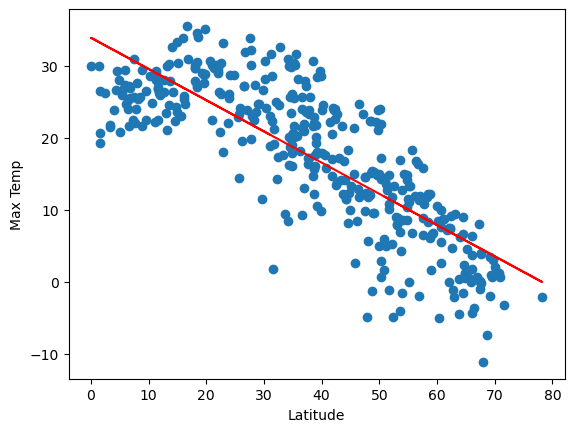

In [15]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hem-0.808964459543422i_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.8101142957604677


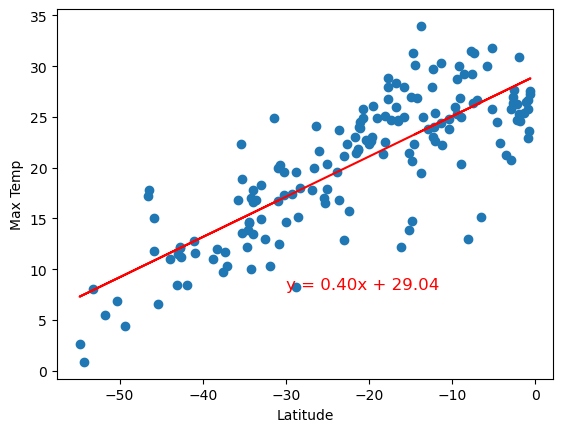

In [16]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** Relationship between Temperature and Latitude:

*There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of -0.808964459543422 on Northern Hemisphere.
*There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of 0.8101142957604677 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10192241908390481


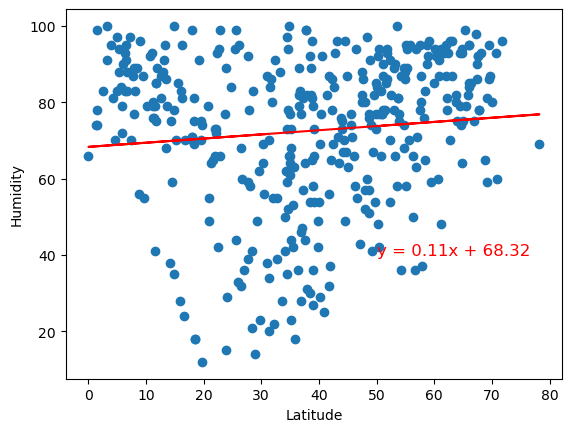

In [17]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.05210863473698021


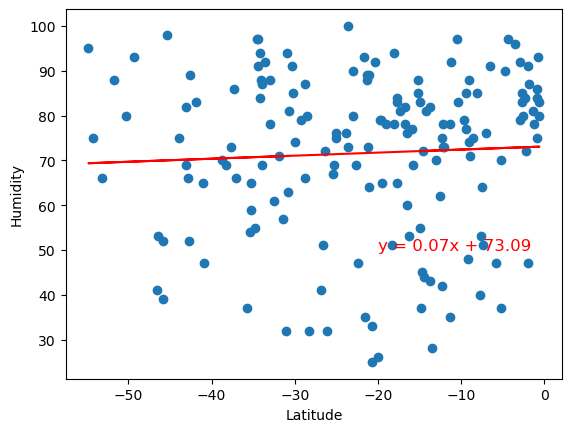

In [18]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:*Relationship between Humidity and Latitude:

*There is a relatively week +ve correlation between humidity and latitude with a correlation coefficient of 0.10192241908390481 on Northern Hemisphere.
*There is a relatively very week  correlation correlation between humidity and latitude with a correlation coefficient of 0.05210863473698021 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07036916335427049


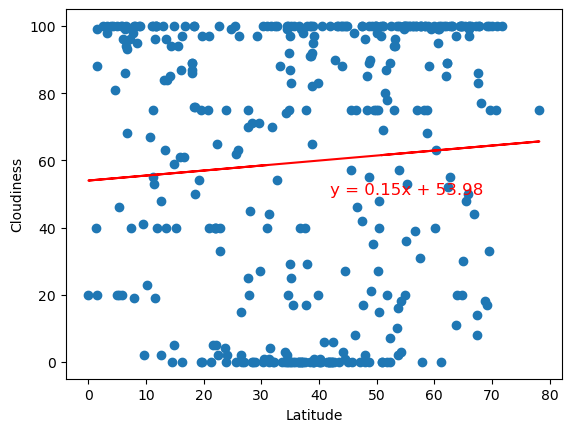

In [19]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: 0.05801508072658086


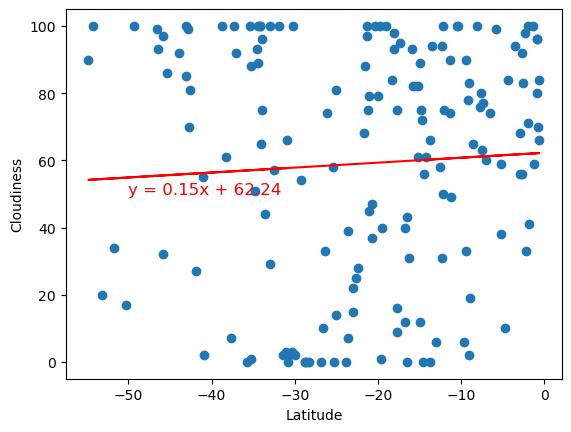

In [20]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:* Relationship between Cloudiness and Latitude:
*There is a week +ve correlation between cloudiness and latitude with a correlation coefficient of 0.07036916335427049 on Northeren Hamisphere.
*There is a week  correlation between cloudiness and latitude with a correlation coefficient of  0.05801508072658086 on Southeren  Hamisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09750635616709692


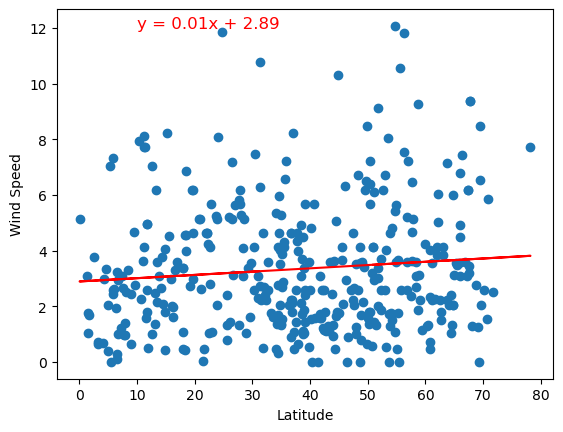

In [21]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.05966272065711817


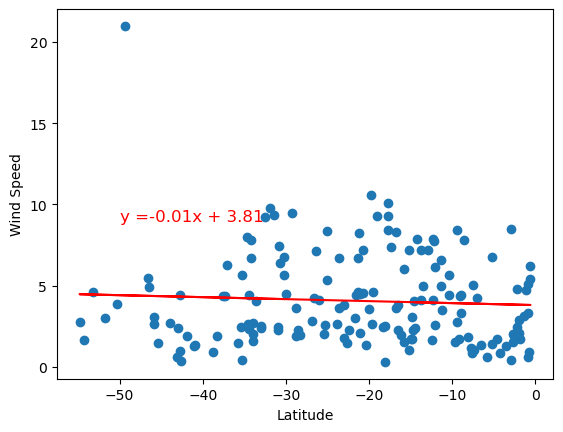

In [22]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:* Relationship Between Wind Speed And Latitude:
*There is almost week +ve corrilation between wind speed and latitude with a correlation coefficient of 0.09750635616709692  on Northern Hemisphere.
*There is a week -ve  correlation between wind speed and latitude with a correlation coefficient of  -0.05966272065711817 on Southern Hemisphere.   